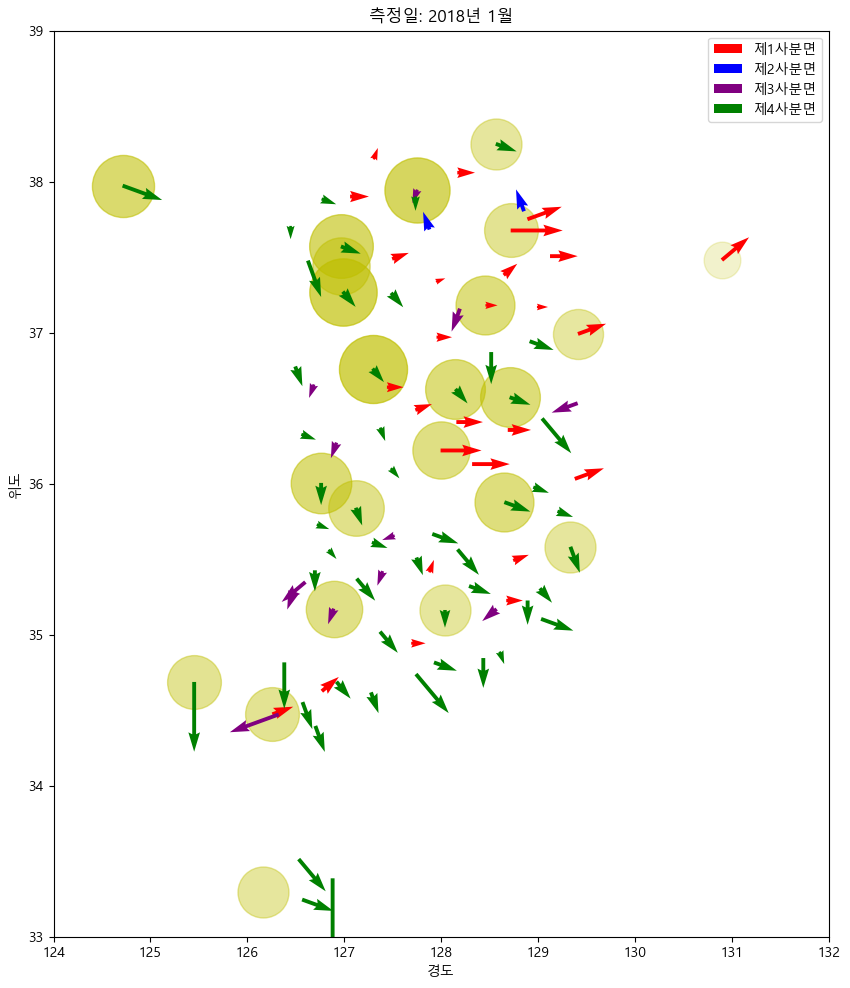

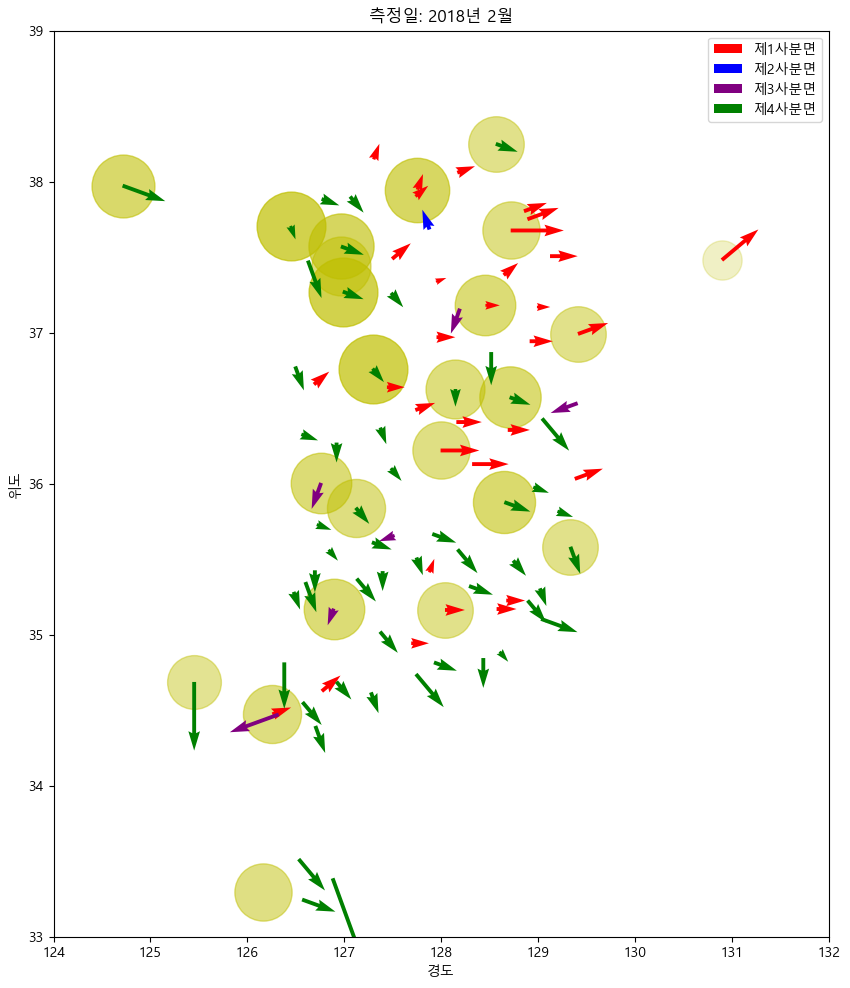

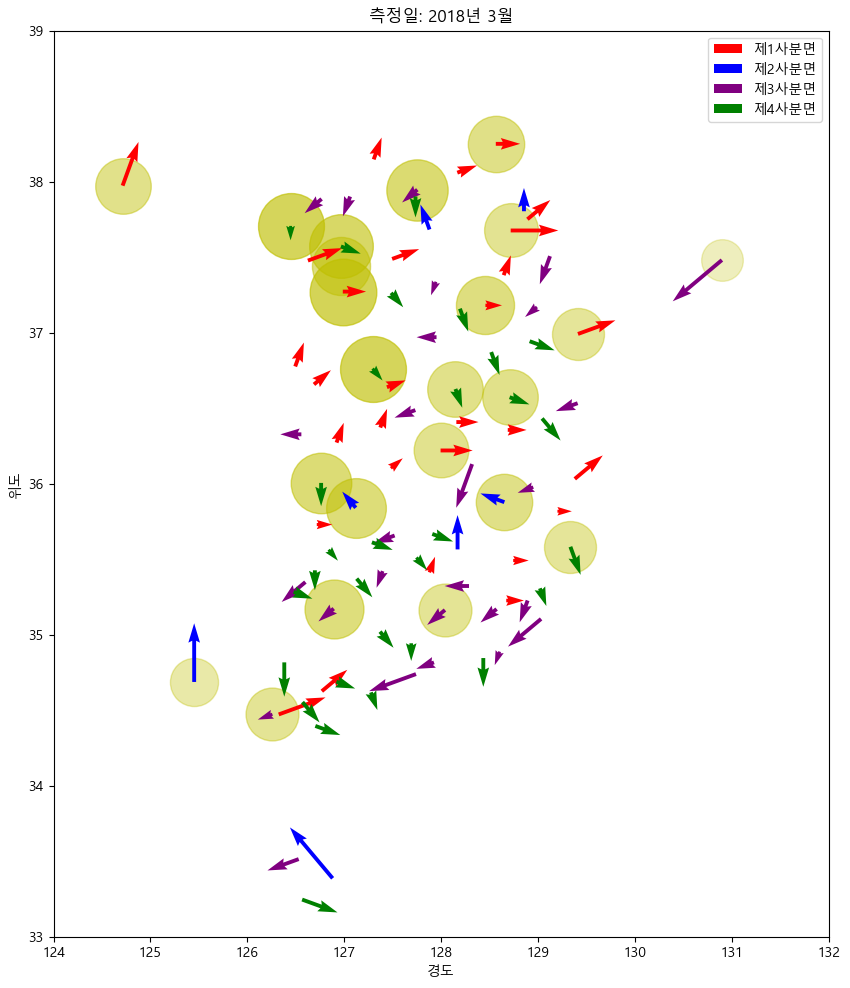

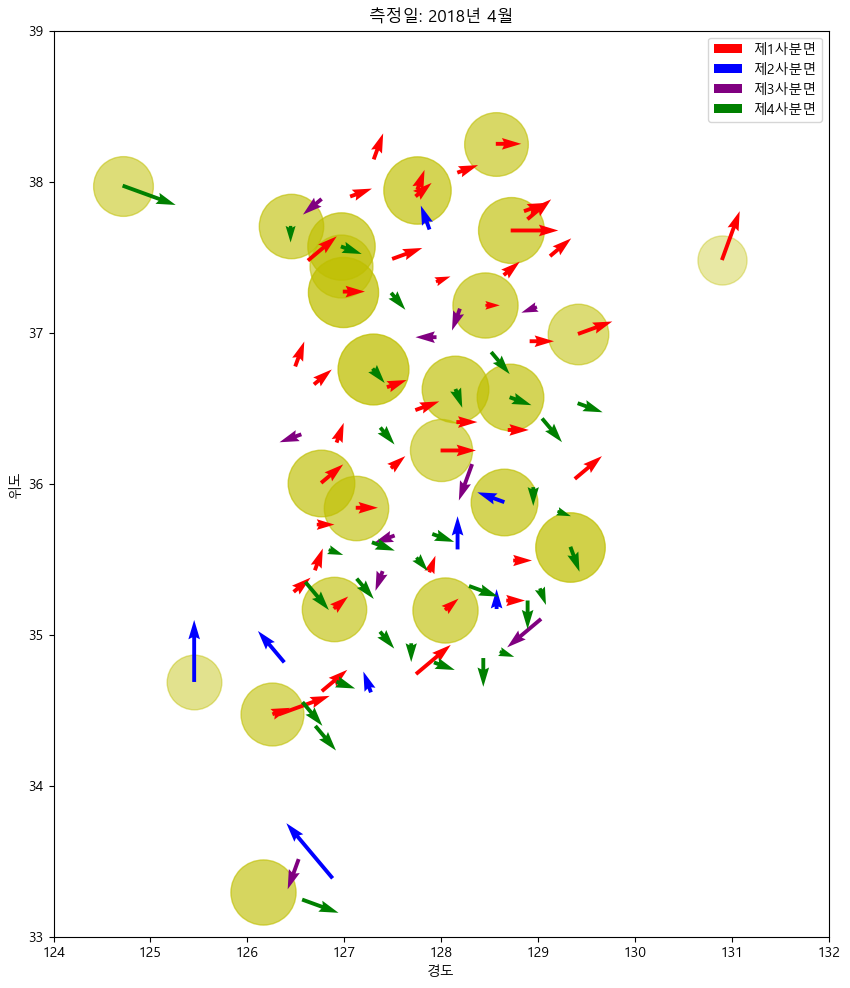

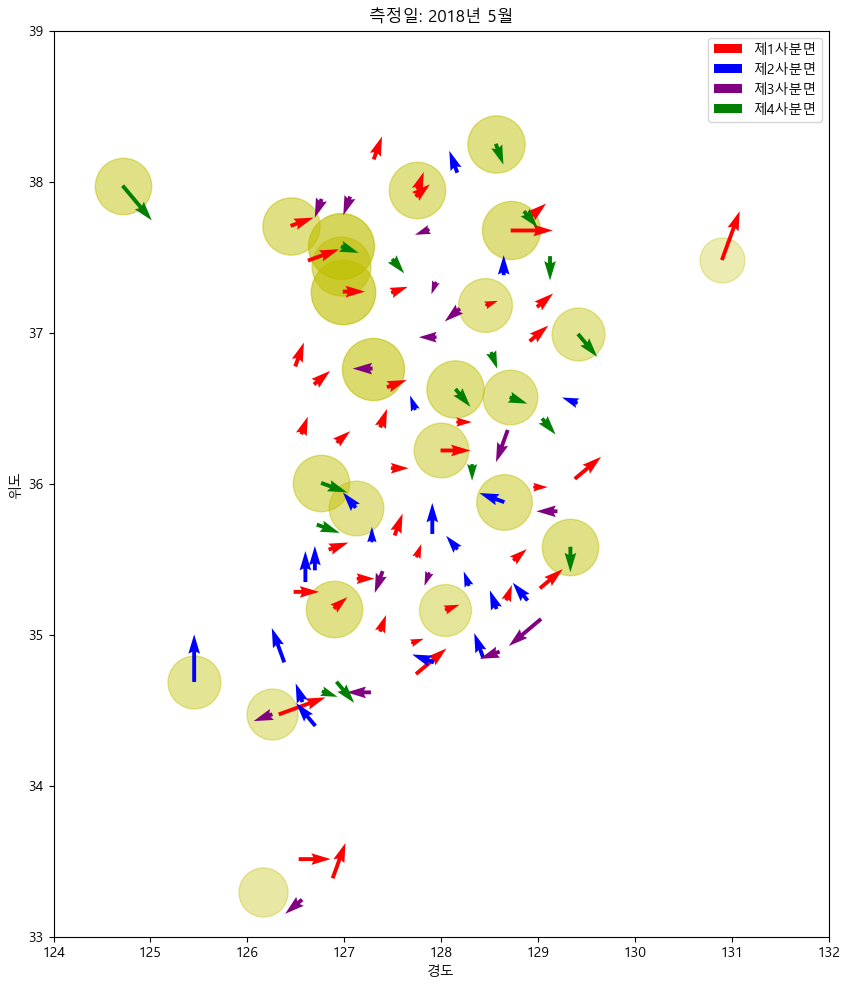

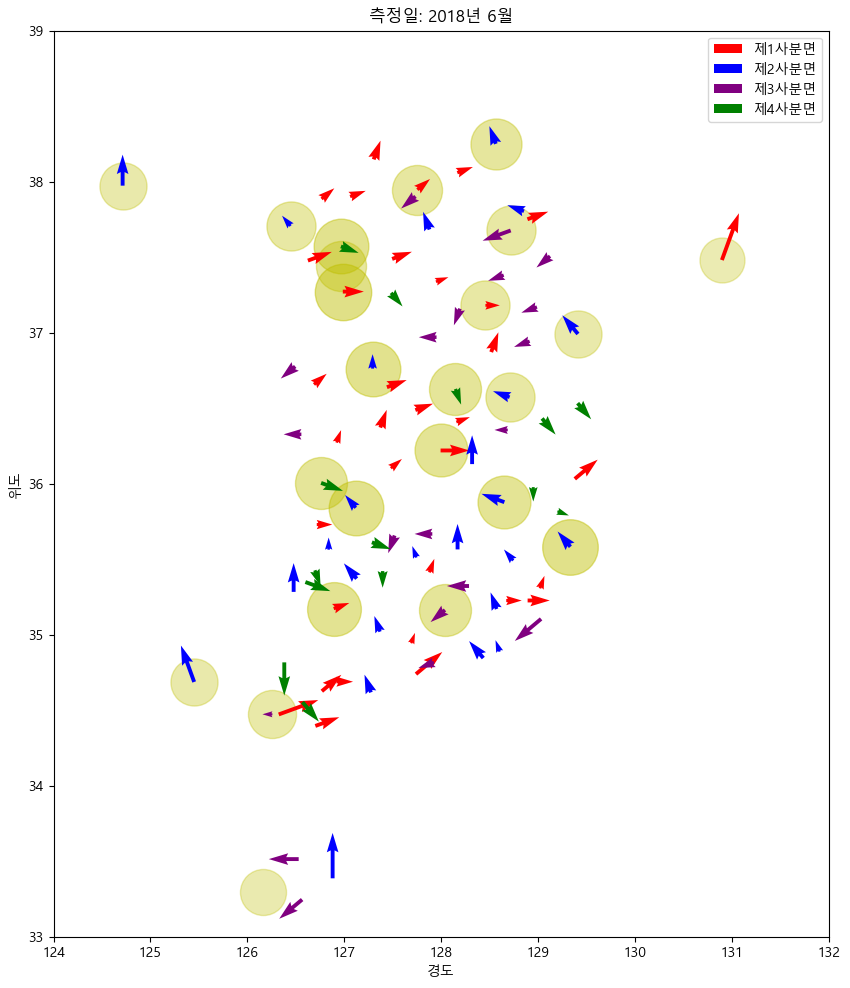

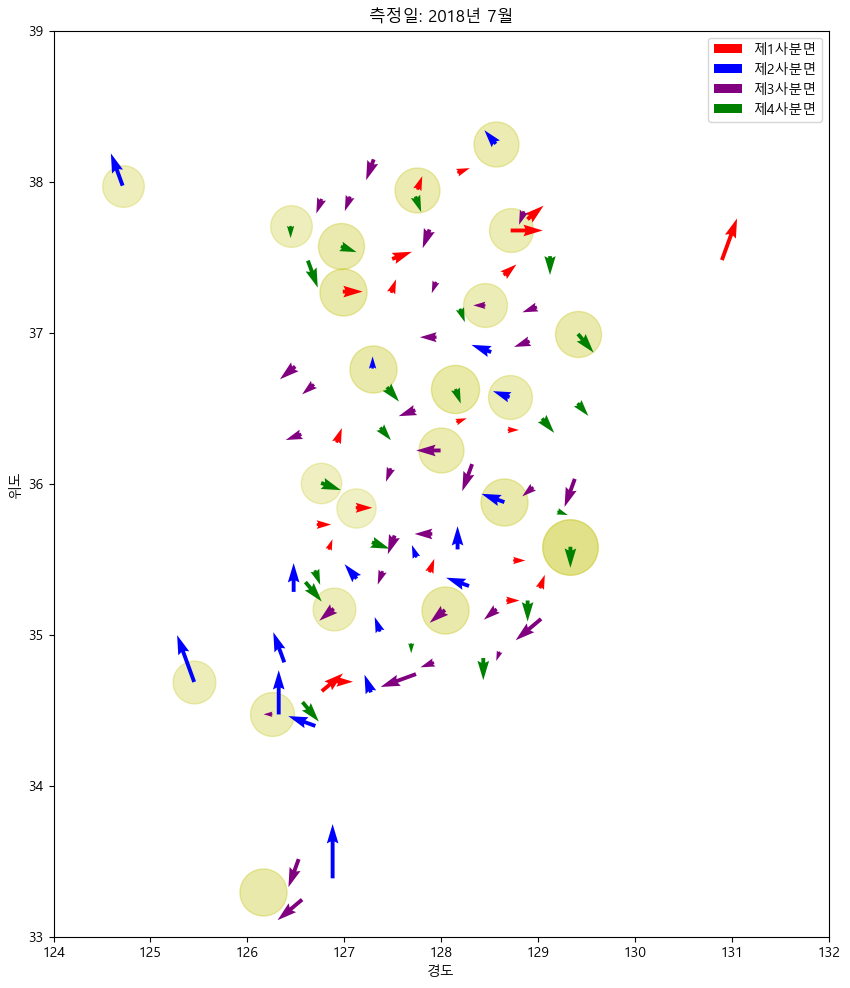

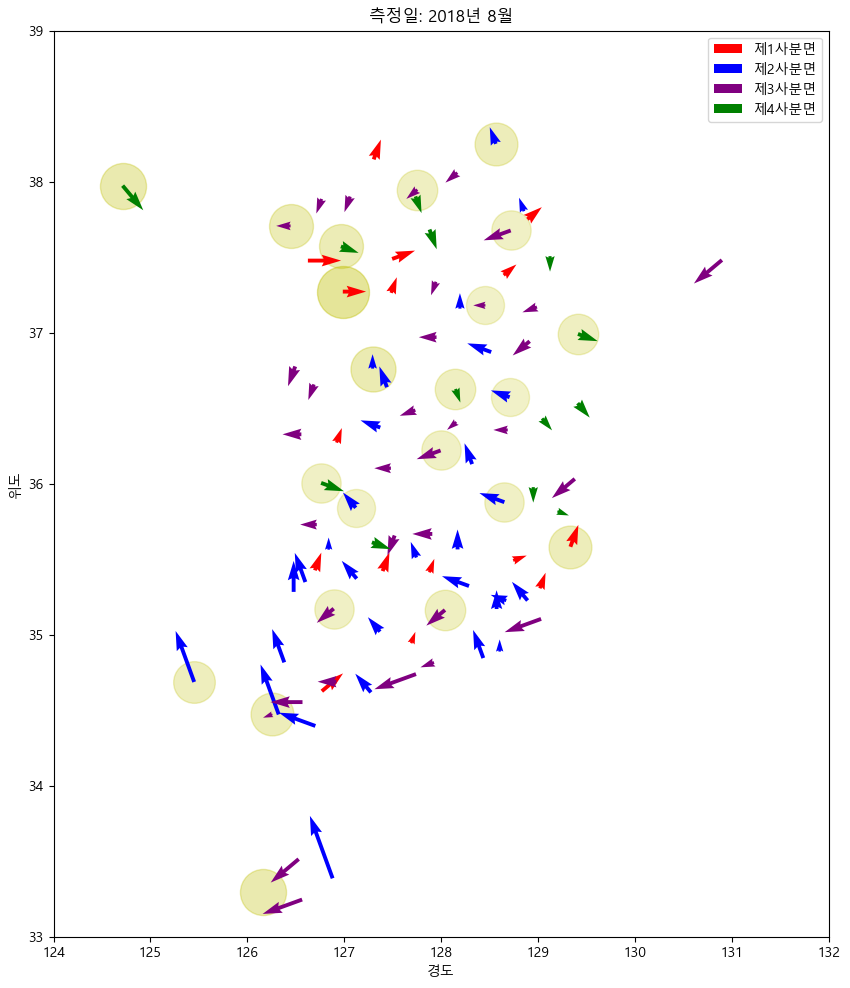

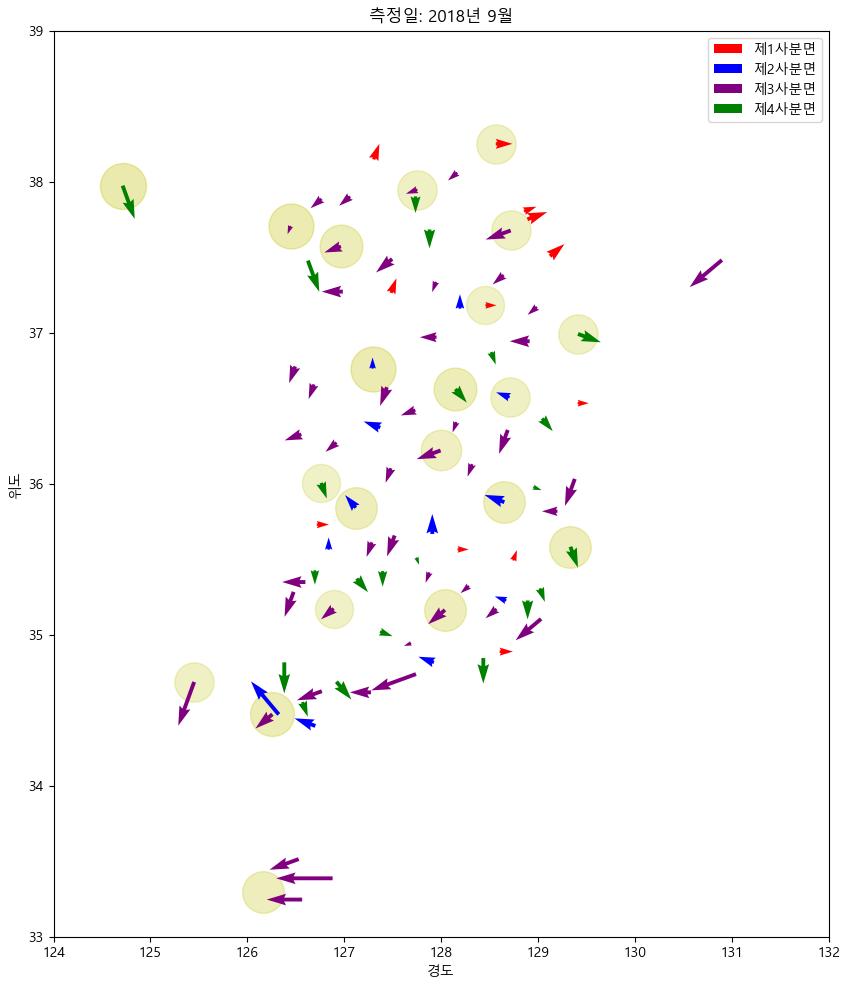

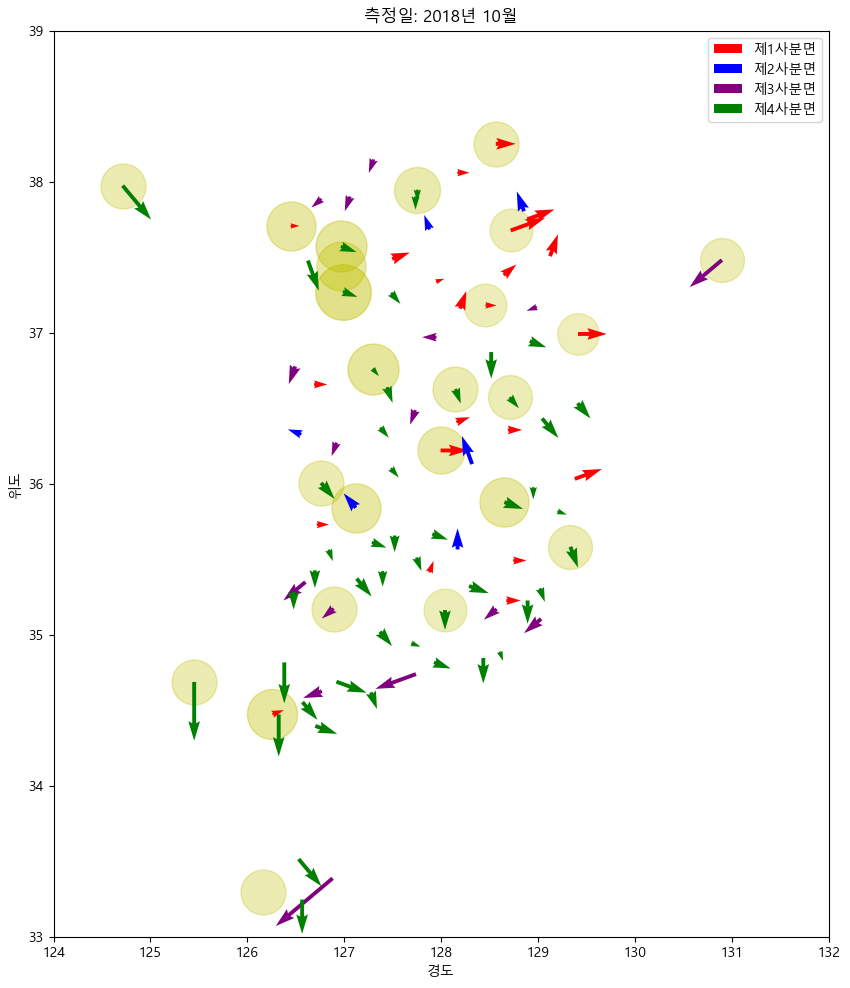

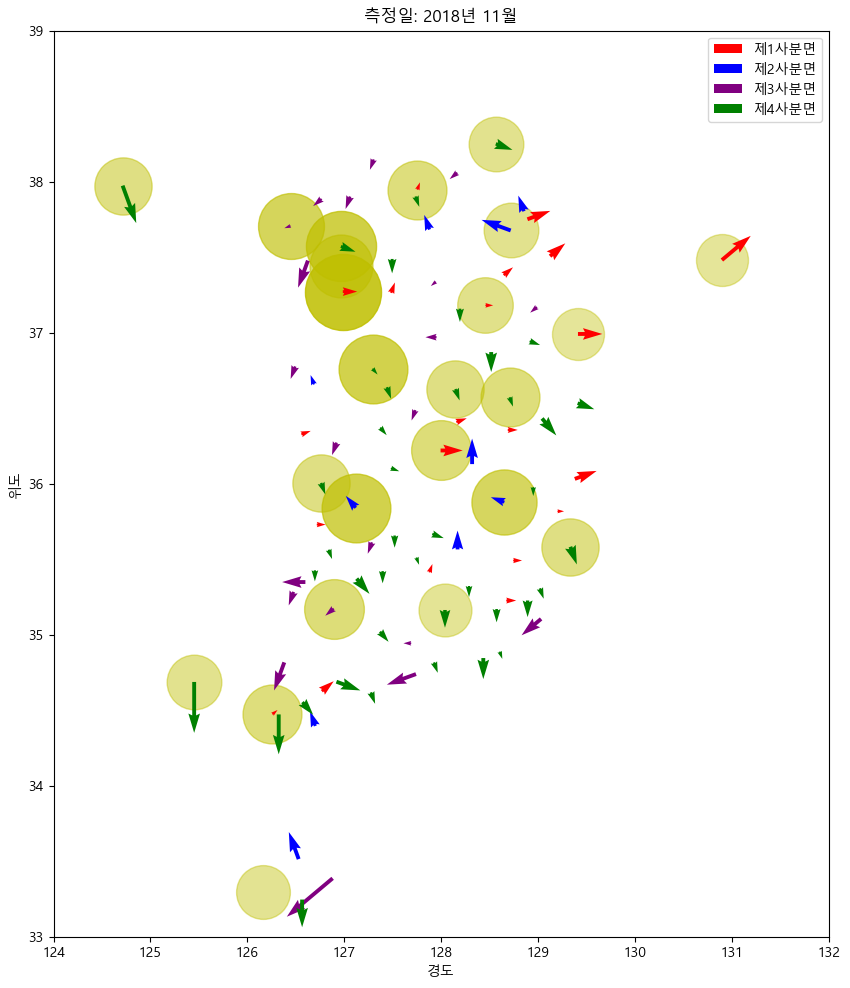

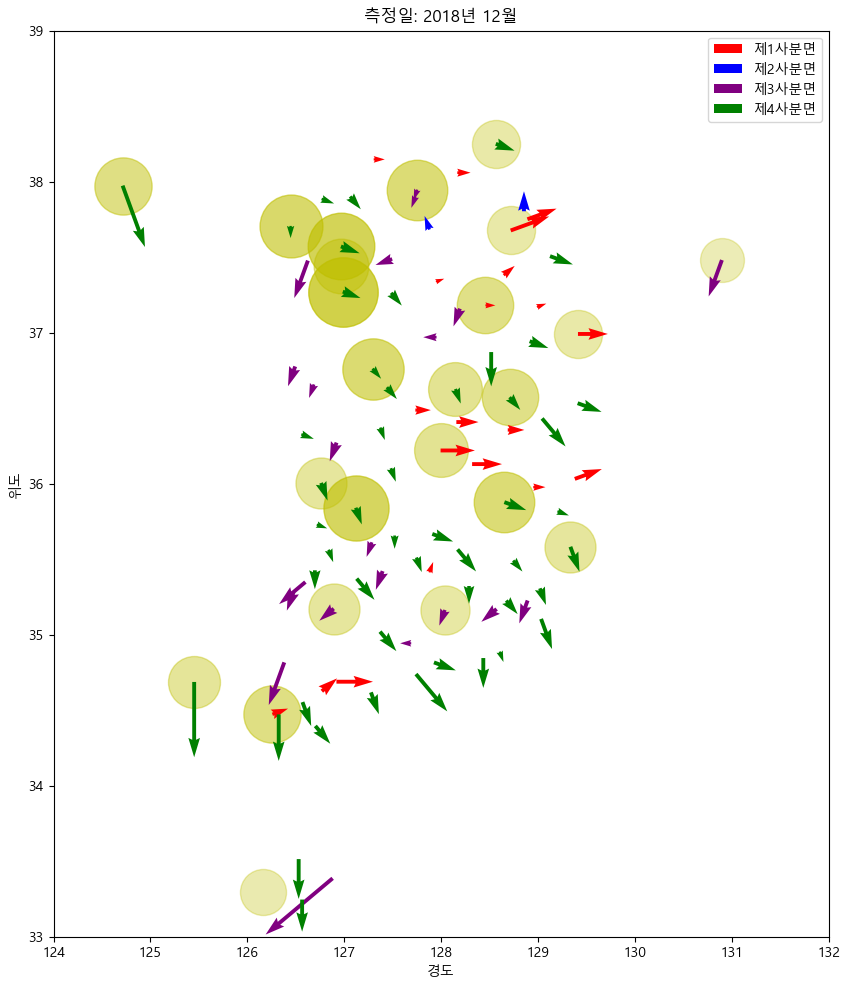

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import copy

#이건 다 아실거라 믿습니다.
tude=[]
bkupdata=[]
vector=[]

file=open('위도경도.csv')    #위도경도 데이터 (출처:https://data.kma.go.kr/cmmn/main.do)
data=csv.reader(file)
next(data)
for row in data:
    tude.append([(float(row[5])),float(row[6]),row[0]])


f=open('20190602233826.csv')    #2018.01~2018.12 데이터 (출처:https://data.kma.go.kr/cmmn/main.do)
data2=csv.reader(f)
next(data2)
for row in data2:    
    row[1]=list(map(int,row[1].split('-')))
    if row[2]!='':
        bkupdata.append(row)

imshi=[]
winds=[]

date=[]

for i in range(len(bkupdata)-1):    #풍향풍속 데이터를 날짜가 같은것끼리 묶음
    if i<len(bkupdata)-1:
        if bkupdata[i][1]==bkupdata[i+1][1]:
            imshi.append(bkupdata[i])
        else:
            imshi.append(bkupdata[i])
            winds.append(imshi)
            date.append(bkupdata[i][1])
            imshi=[]
    else:
        imshi.append(bkupdata[i])
        winds.append(imshi)
        date.append(bkupdata[i][1])
        imshi=[]

def vec(lis):    #데이터 형식이 방향과 크기만 있어서 x좌표와 y좌표로 나눠서 리스트에 저장하고, 키랑 같이 저장함
    vector=[]
    for datum in lis:
        vector.append([datum[0],float(datum[2])*np.sin(np.deg2rad(int(datum[3]))),float(datum[2])*np.cos(np.deg2rad(int(datum[3])))])
    return vector

def num(lis):    #관측소별 고유 코드 모으는 함수
    numbar=[]
    for datum in lis:
        numbar.append(datum[0])
    return numbar
vector=[]
numbar=[]
for i in range(len(winds)):
    vector.append(vec(winds[i]))
    numbar.append(num(winds[i]))

def modified(tudea,numbar,inja):    #많이 쓸 줄 알았는데 2번 씀 ㅋㅋ
    #위도경도 데이터가 정제되어 있지 않아서 중복되는것과 없는 관측소도 위도경도가 있음, 그래서 그거 제거하는 함수
    i=0
    while 1:
        if tudea[i][inja]==tudea[i+1][inja]:
            del tudea[i+1]
        if tudea[i][inja] not in numbar:
            del tudea[i]
            i-=1
        i+=1
        if i>=len(tudea)-1:
            break
    for i in range(len(tudea)-1):
        if i>=len(tudea)-1:
            break
        if tudea[i][inja]==tudea[i+1][inja]:
            del tudea[i+1]
    return tudea

 
aptude=[]
retude=copy.deepcopy(tude)
for i in range(len(winds)):
    aptude.append(modified(tude,numbar[i],2))

dustdata=[]
g=open('sorteddust.csv')    #코드가 날짜별로 분석해서 날짜별로 sort함
data3=csv.reader(g)
for i in range(5):
    next(data3)
for row in data3:
    row[2]=list(map(int,row[2].split('-')))
    if row[3]=='':
        row[3]='0'
    dustdata.append(row)

dtdata=[]
injik=[]
for i in range(len(dustdata)-1):    #위랑 똑같은 코드
    if i<len(dustdata)-1:
        if dustdata[i][2]==dustdata[i+1][2]:
            injik.append(dustdata[i])
        else:
            injik.append(dustdata[i])
            dtdata.append(injik)
            injik=[]
    else:
        injik.append(dustdata[i])
        dtdata.append(injik)
        injik=[]
        
        
dtnumb=[]
finedust=[[]*i for i in range(len(dtdata))]    #위와 다르게 미세먼지 농도가 중요하기 때문에 그 중에서 농도 데이터만 추출해서 키랑 엮음
for i in range(len(dtdata)):
    dtnumb.append(num(dtdata[i]))
    for j in range(len(dtdata[i])):
        if dtdata[i][j][3]!='':
            finedust[i].append([dtdata[i][j][0],int(dtdata[i][j][3])])
        else:
            finedust[i].append([dtdata[i][j][0],0])    #데이터중에 공백데이터를 처리하기 위함

mitude=[]
for i in range(len(dtnumb)):
    mitude.append(copy.deepcopy(modified(copy.deepcopy(retude),dtnumb[i],2)))
    mitude[i].pop()    #알 수 없는 이유로 마지막 리스트가 공백이 뜸, 그래서 제거
dust=[]

#이제 plt함

amount = len(winds)

x3=[[]*i for i in range(len(winds))]
y3=[[]*i for i in range(len(winds))]
xv=[[]*i for i in range(len(winds))]
yv=[[]*i for i in range(len(winds))]
x2=[[]*i for i in range(len(winds))]
y2=[[]*i for i in range(len(winds))]
for j in range(len(winds)):
    for i in range(len(aptude[j])):
        x3[j].append(aptude[j][i][1])
        y3[j].append(aptude[j][i][0])
        xv[j].append(-(vector[j][i][1]*0.05))
        yv[j].append(-(vector[j][i][2]*0.05))
        x2[j].append(aptude[j][i][1]-(vector[j][i][1]*0.05))
        y2[j].append(aptude[j][i][0]-(vector[j][i][2]*0.05))
x=[[]*i for i in range(len(tude))]
y=[[]*i for i in range(len(tude))]
for i in range(len(x2)):
    for j in range(len(x2[0])):
        x[j].append(x2[i][j])
        y[j].append(y2[i][j])

for i in range(len(winds)):
    pltlist1=[[]*i for i in range(4)]
    pltlist2=[[]*i for i in range(4)]
    pltlist3=[[]*i for i in range(4)]
    pltlist4=[[]*i for i in range(4)]
    qr1,qr2,qr3,qr4=0,0,0,0
    plt.figure(figsize=(10,12),dpi=100)
    plt.xlim(124,132)
    plt.ylim(33,39)
    plt.xlabel('경도')
    plt.ylabel('위도')
    tit='측정일: '+str(date[i][0])+'년 '+str(date[i][1])+'월'
    plt.title(tit)
    plt.rc('font',family='Malgun Gothic') 
    for j in range(len(mitude[i])):
        plt.scatter(mitude[i][j][1],mitude[i][j][0],color='y',alpha=finedust[i][j][1]/70,s=50*finedust[i][j][1])
    for j in range(len(tude)):
        if xv[i][j]>=0:
            if yv[i][j]>=0:
                qr1+=1
                pltlist1[0].append(x3[i][j])
                pltlist1[1].append(y3[i][j])
                pltlist1[2].append(xv[i][j])
                pltlist1[3].append(yv[i][j])
                
            elif yv[i][j]<0:
                qr4+=1
                pltlist4[0].append(x3[i][j])
                pltlist4[1].append(y3[i][j])
                pltlist4[2].append(xv[i][j])
                pltlist4[3].append(yv[i][j])
                
        elif xv[i][j]<0:
            if yv[i][j]>=0:
                qr2+=1
                pltlist2[0].append(x3[i][j])
                pltlist2[1].append(y3[i][j])
                pltlist2[2].append(xv[i][j])
                pltlist2[3].append(yv[i][j])
                
            elif yv[i][j]<0:
                qr3+=1
                pltlist3[0].append(x3[i][j])
                pltlist3[1].append(y3[i][j])
                pltlist3[2].append(xv[i][j])
                pltlist3[3].append(yv[i][j])
                
    plt.quiver(pltlist1[0],pltlist1[1],pltlist1[2],pltlist1[3],color='red',width=0.005, scale=3.5,label='제1사분면')
    plt.quiver(pltlist2[0],pltlist2[1],pltlist2[2],pltlist2[3],color='b',width=0.005, scale=3.5,label='제2사분면')
    plt.quiver(pltlist3[0],pltlist3[1],pltlist3[2],pltlist3[3],color='purple',width=0.005, scale=3.5,label='제3사분면')
    plt.quiver(pltlist4[0],pltlist4[1],pltlist4[2],pltlist4[3],color='g',width=0.005, scale=3.5,label='제4사분면')
    plt.legend()
    #plt.savefig('결과'+str(i))
    plt.show()
#민규야 힘내